<h1><b>Laboratory work 6</b></h1>

<h3><b>Topic:</b> Image processing with the OpenCV library </h3>

<h3><b>Goal: </b> get knowledge and skills in digital image processing with OpenCV library</h3>

<h3><center><b>Progress of work</b></center></h3>

In [2]:
print("Variant: " + str(ord('D') % 5 + 1))

Variant: 4


In [3]:
import pandas as pd

In [4]:
import cv2

In [5]:
import numpy as np

In [6]:
from PIL import Image, ImageDraw

In [15]:
import matplotlib.pyplot as plt

<h5><b>Task 1: </b>Download data from a file lab6.xlsx to the dataframe</h5>

In [57]:
df = pd.read_excel('lab6.xlsx')
df.head()

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cyan,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


<h5><b>Task 2: </b>Get your variant data from the dataframe using indexing tools</h5>

In [78]:
variant_data = df[df['N'] == 4].iloc[0]

In [79]:
image_path = variant_data['file name']
image_size = tuple(map(int, variant_data['image size'].split('x')))
glasses_color = variant_data['glasses color']
line_width = int(variant_data['line width'])

In [80]:
# Detect face and eyes
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

<h5><b>Task 3: </b>Create a function that takes data from the dataframe as arguments and returns a 
reduced image with added "round glasses" and saves the resulting image to a file.</h5>

In [1]:
def add_round_glasses(image_path, output_path, size=(600, 600), glasses_color="magenta", line_width=5):
    # Load image
    image = cv2.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        print("No face detected.")
        return
    
    x, y, w, h = faces[0]
    
    # Crop the image around the face with padding
    padding = int(0.5 * w)
    x1 = max(0, x - padding)
    y1 = max(0, y - padding)
    x2 = min(image.shape[1], x + w + padding)
    y2 = min(image.shape[0], y + h + padding)
    
    cropped_image = image[y1:y2, x1:x2]
    
    # Resize the cropped image to the specified size (saving the proportions)
    pil_cropped = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    pil_cropped.thumbnail(size, Image.LANCZOS)
    
    # Convert resized cropped image to CV2 format for eye detection within the cropped face
    resized_image = np.array(pil_cropped)
    resized_gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    
    # Detect eyes
    eyes = eye_cascade.detectMultiScale(resized_gray)
    
    # Convert the resized image to RGB for PIL compatibility
    pil_image = Image.fromarray(resized_image)
    draw = ImageDraw.Draw(pil_image)
    
    # Drawglasses
    color = glasses_color.lower()
    if len(eyes) >= 2:
        # Sort eyes by x-coordinate to distinguish left and right eyes
        eyes = sorted(eyes, key=lambda e: e[0])
        (ex1, ey1, ew1, eh1), (ex2, ey2, ew2, eh2) = eyes[:2]
        
        # Calculate centers for each eye
        left_eye_center = (ex1 + ew1 // 2, ey1 + eh1 // 2)
        right_eye_center = (ex2 + ew2 // 2, ey2 + eh2 // 2)
        
        # Radius for glasses
        radius_left = int(ew1 / 2)
        radius_right = int(ew2 / 2)
        
        # Draw glasses circles
        draw.ellipse([(left_eye_center[0] - radius_left, left_eye_center[1] - radius_left),
                      (left_eye_center[0] + radius_left, left_eye_center[1] + radius_left)], 
                     outline=color, width=line_width)
        draw.ellipse([(right_eye_center[0] - radius_right, right_eye_center[1] - radius_right),
                      (right_eye_center[0] + radius_right, right_eye_center[1] + radius_right)], 
                     outline=color, width=line_width)
        
        # Calculate edge points for the connecting line between circles
        left_edge = (left_eye_center[0] + radius_left, left_eye_center[1])
        right_edge = (right_eye_center[0] - radius_right, right_eye_center[1])
        
        # Draw the connecting line between circles
        draw.line([left_edge, right_edge], fill=color, width=line_width)
        
        # Calculate edge points for the side lines extending outward
        left_side_line_start = (left_eye_center[0] - radius_left, left_eye_center[1])
        left_side_line_end = (left_eye_center[0] - radius_left - radius_left, left_eye_center[1])
        right_side_line_start = (right_eye_center[0] + radius_right, right_eye_center[1])
        right_side_line_end = (right_eye_center[0] + radius_right + radius_right, right_eye_center[1])
        
        # Draw the side lines on both sides of the glasses
        draw.line([left_side_line_start, left_side_line_end], fill=color, width=line_width)
        draw.line([right_side_line_start, right_side_line_end], fill=color, width=line_width)

    # Save the final image
    pil_image.save(output_path)
    print(f"Image saved at {output_path}")
    
    # Display the final image
    plt.imshow(pil_image)
    plt.axis('off')
    plt.show()

Image saved at longbottom_with_glasses.jpg


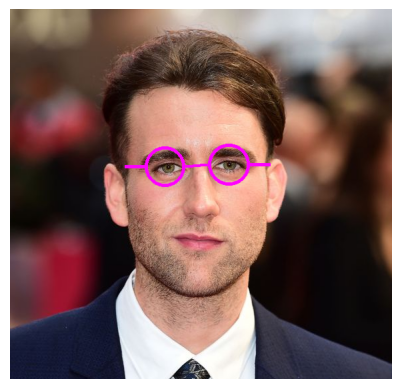

In [83]:
add_round_glasses(image_path, 'longbottom_with_glasses.jpg', size=image_size, glasses_color=glasses_color, line_width=line_width)

<h4><b>Conclusion: </b>during this laboratory work i boost knowledge how to work with images in Jupyter notebook using OpenCV library.</h4>